# Chapter 5: Introduction to Bayesian Statistics

Prepared by David Kirkby for the 11-Feb-2016 Study Group

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Who Invented Bayesian Statistics?

![Image of Thomas Bayes](
https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif "Thomas Bayes (1701-1761)")
![Image of Pierre Simon Laplace](
https://upload.wikimedia.org/wikipedia/commons/9/91/Pierre-Simon-Laplace_%281749-1827%29.jpg
"Pierre Simon Laplace (1749-1827)")

## Who Almost Killed Bayesian Statistics?

![Image of Ronald Fisher](
https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG "Thomas Bayes (1890-1962)")

## Common Ground

Bayes' Theorem is a non-controversial principle / axiom of probability theory:

$$
p(B\,|\, A) = \frac{ p(A\,|\, B)\; p(B) }{ p(A) }
$$

Both paradigms use the **likelihood** to quantify the agreement between observed data $D$ and a model $M$ with parameters $\vec{p}$:

$$
{\cal L}(\vec{p}) = P(D\,|\,M) = \Pi_{i=1}^{N} \text{pdf}(D_i\,|\,\vec{p})
$$

When there is lots of good data, any sensible inference method gives essentially the same answers because the likelihood dominates.

## The Issues

Frequentist statistics:
* Probability can only be determined from relative frequency observed in data.
* Model parameters have fixed but unknown values. Probability statements about parameter values are meaningless.

Bayesian statistics:
* Probability represents subjective belief, informed by (but not limited to) frequencies observed in data.
* Model parameters can be described using probabilities.

Bayes' Theorem applies to probabilities, so the Bayesian viewpoint allows us to take $A = D$ (data) and $B = M$ (model), leading to:

$$
p(M\,|\, D) = \frac{ p(D\,|\, M)\; p(M) }{ p(D) }
$$

The denominator is just a normalization constant needed to ensure that the result is a probability:

$$
P(D) = \int p(D\,|\, M)\; p(M) dM
$$

Therefore, the only ingredients of a Bayesian analysis are the *likelihood* $ p(D\,|\, M)$ and the **prior** $P(M)$. The controversy is all about whether a prior is a legitimate construct, and how to interpret statistical inferences that incorporate some degree of subjectivity via priors.

In practice, frequentists often gives their result in terms of the maximum likelihood point with some error estimate, while Bayesians consider the whole posterior distribution to be their result.

The frequentist paradigm is based on a rigorous and objective mathematical framework but, taken literally, cannot answer any interesting questions.  For example, I roll one dice 1000 times, I can only make statements about the probability of a six occuring with the same dice during the same period.  I cannot make any statements about the probability of a six on a different dice or the same dice tomorrow, since these require subjective assumptions (priors) beyond what I have actually observed.

On the other hand, a Bayesian analysis allows you to answer lots of interesting questions, at the cost of requiring some subjective input and abandoning the rigorous framework of frequentism.

A Bayesian analysis also allows you to treat some model parameters as **nuisance parameters** that you integrate out or **marginalize**, e.g.

$$
P(D\,|\,\theta_1) = \int P(D\,|\,\theta_1,\theta_2) P(\theta_2) d\theta_2
$$

This procedure is meaningless in the frequentist paradigm since it requires assigning relative probabilities for different values of the nuisance parameter in the integral.

## Motivation for including priors: The Bus Problem

Section 5.1 motivates the value of priors with a simple example: suppose you arrive at a bus stop where a bus arrives every $T$ minutes, but you have no information about its schedule.  The next bus arrives after $t$ minutes: what is your best guess at the value of $T$?

The starting point for any analysis (frequentist or Bayesian) is the likelihood which, in this example, is a function of $T$.

In [143]:
def bus_problem(n_obs, T_true=10., seed=1, bayes=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    gen = np.random.RandomState(seed)
    t_obs = gen.uniform(low=0., high=T_true, size=n_obs)
    ax1.hist(t_obs, range=(0., T_true), bins=10, histtype='stepfilled', color='b', alpha=0.25, label='data')
    ax1.scatter(t_obs, [0.25 * n_obs / T_true ] * n_obs, marker='x', color='b')
    
    t = np.linspace(-0.1, 1.6 * T_true, 171)
    model = lambda T: n_obs / T * (t < T) * (t >= 0)
    ax1.plot(t, model(0.5 * T_true), 'b-', label='$0.5\\times T_{true}$')
    ax1.plot(t, model(1.0 * T_true), 'r-', label='$1.0\\times T_{true}$')
    ax1.plot(t, model(1.5 * T_true), 'g-', label='$1.5\\times T_{true}$')
    ax1.legend(loc='upper right')
    
    ax1.set_xlim(-0.5, 1.6 * T_true)
    ax1.set_ylim(0., None) #2.1 * n_obs / T_true)
    ax1.set_xlabel('Wait Time')
    ax1.set_ylabel('')
    
    T_ratio = np.linspace(0.1, 2.5, 500)
    T = T_ratio * T_true
    likelihood = 1.0 / T * (T >= np.max(t_obs))
    ax2.axvline(1.0, ls='--', color='r', label='$T_{true}$')
    ax2.plot(T_ratio, likelihood, 'b-', label='$p\,(D|M)$')
    if bayes:
        prior = 1 / T
        ax2.plot(T_ratio, prior, 'g:', label='$p\,(M)$')
        # This isn't properly normalized.
        posterior = prior * likelihood
        ax2.plot(T_ratio, posterior, 'k-.', label='$p\,(M|D)$')
        post_mean = np.sum(T / T_true * posterior) / np.sum(posterior)
        ax2.axvline(post_mean, color='k', ls='dashdot', label='post. mean')
        print('Posterior mean = {0:.1f} x T(true)'.format(post_mean))
    
    ax2.legend()
        
    ax2.set_xlim(0.1, 1.6)
    ax2.set_ylim(0., 1.5 * np.max(likelihood))
    ax2.set_xlabel('Model Parameter $T / T_{true}$')

First imagine that we repeated our experiment on 100 different days, giving 100 values of $t$.  The maximum likelihood then occurs very close to the true value of $T$:

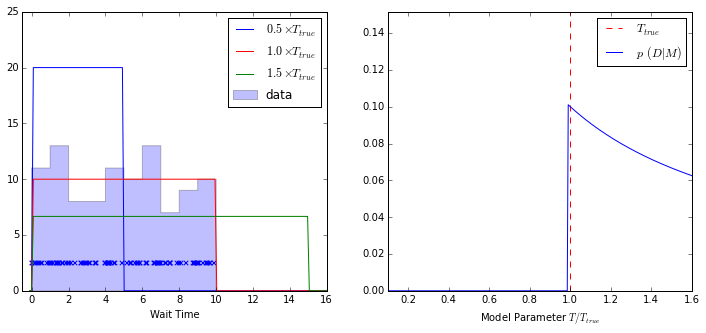

In [144]:
bus_problem(n_obs=100)

With only a week of data, the error is larger and we notice that the maximum likelihood value always underestimates the true value of $T$:

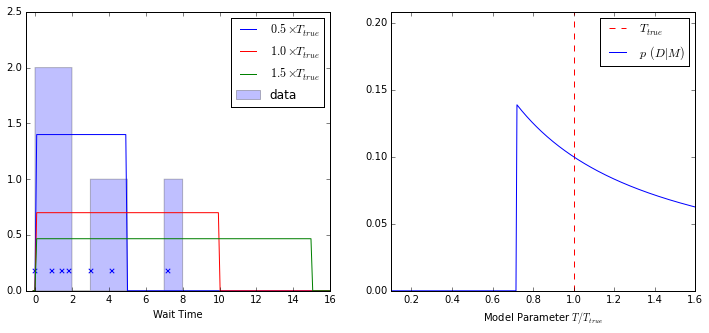

In [145]:
bus_problem(n_obs=7)

With only a single data point, as in the example in the book, the maximum likelihood estimate of $T$ is just the observed value of $t$:

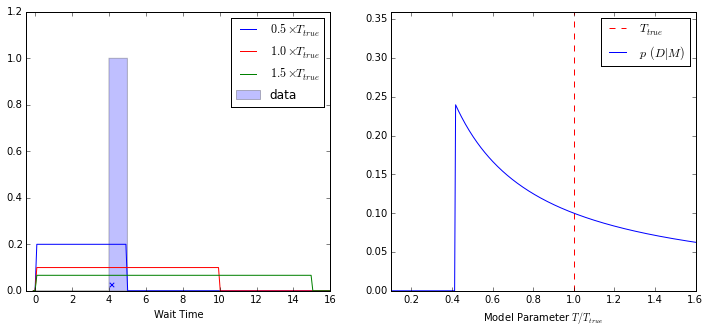

In [146]:
bus_problem(n_obs=1)

## How to Chose Priors?

### Informative Priors

When there is already an established measurement or prediction for one of your model parameters, you can turn this into an **informative prior**.  A Bayesian analysis is then effectively updating the previous knowledge to include anything learned by your new data (which might be very little).

Even when an informative prior is available, you might choose not to use it so your analysis tells you the power of your data on its own.

### Uninformative Priors

In the absence of an informative prior, you still need to specify a prior. If you have lots of good data, your choice of prior will not matter.  However, with a weak likelihood, your choice of prior will influence the result.  This means you need to start getting more data, but you should also think carefully about your priors and see just how sensitive your answers are to these choices.

One procedure for establishing an uninformative prior is to identify a transformation of the parameter that should not change the answer.  For example, if adding an offset to the definition of a parameter $\theta$ should not change the answer, then:

$$
p(\theta) d(\theta) = p(\theta + \delta\delta) d(\theta + \delta\theta) = p(\theta + \delta\theta) d(\theta)
$$

This requires that
$$
p(\theta) = p(\theta + \delta\theta)
$$
for any $\delta\theta$ so $p(\theta)$ must be a constant.

What if, instead, we expect that rescaling the parameter by a factor $a$ should have not effect (e.g., changing from meters to feet):

$$
p(\theta) d(\theta) = p(a \theta) d(a \theta) = a\, p(a \theta) d(\theta)
$$

In this case, we must have
$$
p(\theta) = a\, p(a \theta)
$$
so that $p(\theta) \propto 1/\theta$.


The parameter $T$ in the bus problem should be independent of whether we measure times in seconds or minutes, so we can re-analyze the problem above with a prior $p(T) = 1/T$:

Posterior mean = 0.9 x T(true)


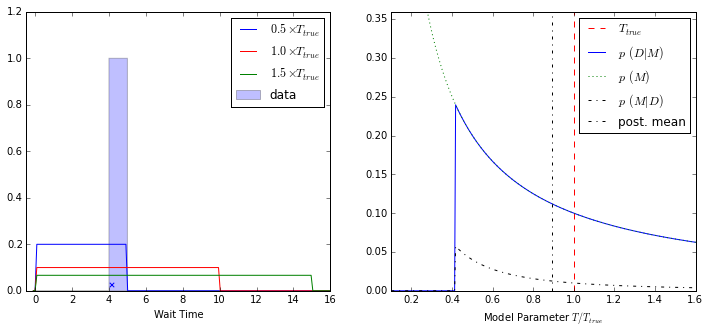

In [141]:
bus_problem(n_obs=1, bayes=True)

However, this example is a bit contrived since a frequentist would correct for the expected bias in the maximum-likelihood estimate, and this naive Bayesian analysis actually gets worse with more data:

Posterior mean = 1.3 x T(true)


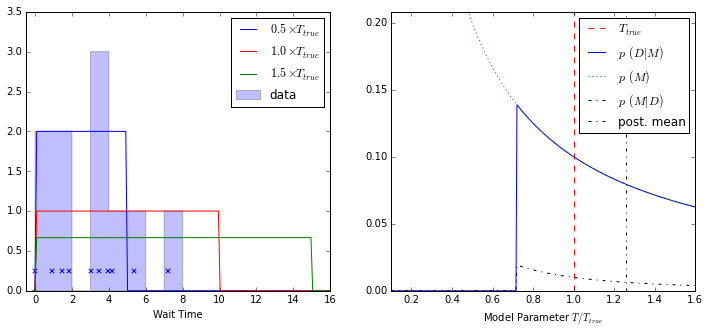

In [142]:
bus_problem(n_obs=10, bayes=True)

There are other formal methods for deriving noninformative priors: see the principle of maximum entropy (5.2.2) for an important example.

## Gaussian Toy Problem

In [246]:
def gauss_study(n_obs, mean_true=10, sigma_true=2.5, n_grid=50, n_sigmas=4, seed=1):
    
    # Generate some random data sampled from the true model.
    gen = np.random.RandomState(seed=seed)
    x = mean_true + sigma_true * gen.normal(size=n_obs)
    
    # Estimate the expected errors on each parameter.
    mean_error = n_sigmas * sigma_true / np.sqrt(n_obs)
    sigma_error = n_sigmas * sigma_true / np.sqrt(2 * (n_obs - 1.))
    
    # Build a parameter grid.
    mean_min, mean_max = mean_true - mean_error, mean_true + mean_error
    sigma_min, sigma_max = max(0.5, sigma_true - sigma_error), sigma_true + sigma_error
    mean_grid = np.linspace(mean_min, mean_max, n_grid)
    sigma_grid = np.linspace(sigma_min, sigma_max, n_grid)
    mean, sigma = np.meshgrid(mean_grid, sigma_grid, sparse=True, copy=False, indexing='xy')
    
    # Calculate the negative-log-likelihood on the parameter grid.
    data = x[:, np.newaxis, np.newaxis]
    nll = np.sum((data - mean) ** 2 / (2 * sigma ** 2) + log(sigma), axis=0)
    nll0 = np.min(nll)
    
    nlp = nll - np.log(1 / sigma)
    nlp0 = np.min(nlp)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.hist(x, bins=20, range=(0., 2 * mean_true), histtype='stepfilled', color='b', alpha=0.25, label='data')
    ax1.set_xlim(0., 2 * mean_true)
    ax1.set_xlabel('Observations')
    
    m = ax2.imshow(nll - nll0, interpolation='none', origin='lower', aspect='auto',
               extent=(mean_grid[0], mean_grid[-1], sigma_grid[0], sigma_grid[-1]))
    levels = np.arange(1., 6.)
    ax2.contour(mean_grid, sigma_grid, nll - nll0, levels, colors='w', linestyles='solid')
    ax2.contour(mean_grid, sigma_grid, nlp - nlp0, levels, colors='w', linestyles='dashed')
    
    plt.scatter(mean_true, sigma_true, marker='x', color='r', s=100.)
    
    plt.colorbar(m).set_label('-log(likelihood)')
    plt.xlim(mean_grid[0], mean_grid[-1])
    plt.ylim(sigma_grid[0], sigma_grid[-1])
    
    ax2.set_xlabel('Mean')
    ax2.set_ylabel('Sigma')

Compare contours of the likelihood $P(D|M)$ (solid curves) and posterior $P(M|D)$ (dashed curves) with an uniformative prior $P(M) = 1/\sigma$.  Note that the influence of the prior decreases with more data.

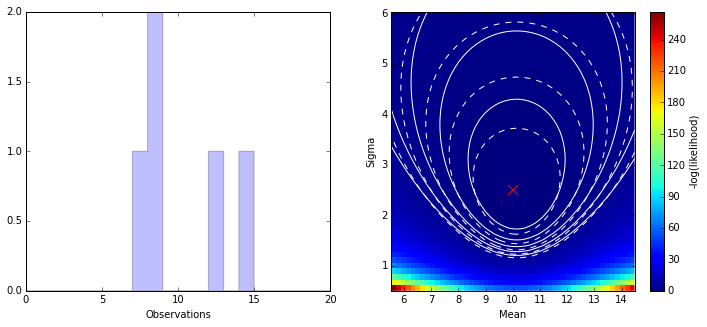

In [247]:
gauss_study(n_obs=5)

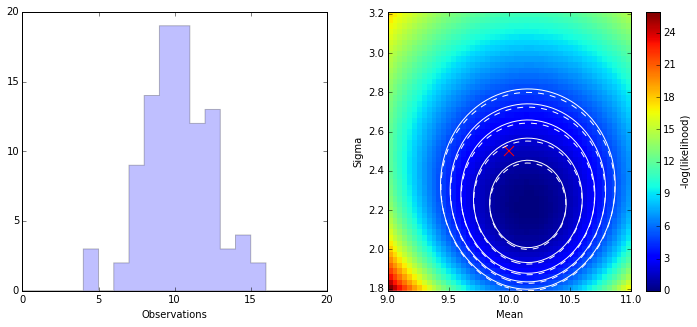

In [248]:
gauss_study(n_obs=100)

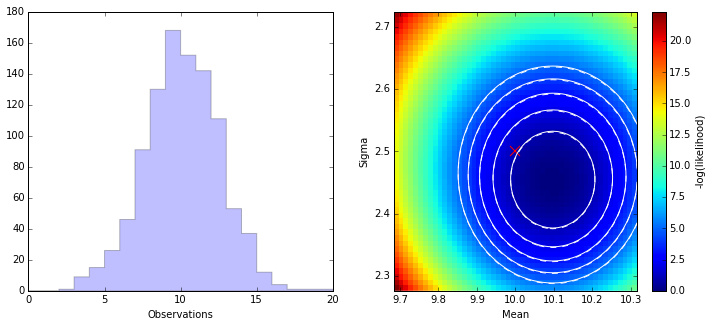

In [249]:
gauss_study(n_obs=1000)

## Recommended Reading

![book cover](http://ecx.images-amazon.com/images/I/51M1qZhLhCL.jpg)
![book cover](http://www.greenteapress.com/thinkbayes/think_bayes_cover_medium.png)